In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import nxviz.plots as nv
import nxviz as nv
from nxviz import annotate
from datetime import datetime

/opt/anaconda3/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
df = pd.read_csv(r'/Users/hernanadasme/Projects/data_challenges/exports_29_11/rectype-63.csv')

In [3]:
df.head()

,Challenge H-ID,rec_Title,Source,Source year,Boxers challenging H-ID,Boxers challenging RecordTitle,Boxer Challenged H-ID,Boxer Challenged RecordTitle,Status,Conditions,Basis,Location Description,City,Location
0,969,Castillo\nBaeza,Semanario La Prensa. Los Andes,1928-03-02,865,"Castillo, Ernesto",836,"Baeza, Florencio",NaN,NaN,NaN,NaN,NaN,POINT(-70.597218 -32.833799)
1,972,Araya\nBolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",780,"Bolli, Carlos",NaN,NaN,NaN,"Manager's business, downtown Los Andes.",NaN,POINT(-70.600875 -32.835752)
2,975,Valdes\nPérez,Semanario La Prensa. Los Andes,1928-04-08,833,"Valdes, Mario",272,"Pérez, Amador",NaN,NaN,NaN,NaN,NaN,POINT(-70.688871 -32.833203)
3,978,Ortiz\nAraya,Semanario La Prensa. Los Andes,1928-04-08,976,"Ortiz, Rafael",882,"Araya, Manuel",NaN,NaN,NaN,NaN,NaN,POINT(-70.598582 -32.833016)
4,985,Valdes\nGallardo,Semanario La Prensa. Los Andes,1928-04-29,833,"Valdes, Mario",827,"Gallardo, Pedro",NaN,NaN,NaN,NaN,NaN,POINT(-70.593621 -32.834478)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Challenge H-ID                  127 non-null    int64 
 1   rec_Title                       127 non-null    object
 2   Source                          127 non-null    object
 3   Source year                     127 non-null    object
 4   Boxers challenging H-ID         127 non-null    int64 
 5   Boxers challenging RecordTitle  127 non-null    object
 6   Boxer Challenged H-ID           127 non-null    int64 
 7   Boxer Challenged RecordTitle    127 non-null    object
 8   Status                          14 non-null     object
 9   Conditions                      14 non-null     object
 10  Basis                           9 non-null      object
 11  Location Description            2 non-null      object
 12  City                            23 non-null     ob

In [5]:
df.rename({'Boxers challenging H-ID': 'challenging_id'}, axis = 1, inplace=True)
df.rename({'Boxer Challenged H-ID': 'challenged_id'}, axis = 1, inplace=True)

In [6]:
df.rename({'Source': 'source'}, axis = 1, inplace=True)
df.rename({'Source year': 'source_year'}, axis = 1, inplace=True)
df.rename({'Boxers challenging RecordTitle': 'boxer_challenging'}, axis = 1, inplace=True)
df.rename({'Boxer Challenged RecordTitle': 'boxer_challenged'}, axis = 1, inplace=True)
df.rename({'Location Description': 'location_descp'}, axis = 1, inplace=True)
df.rename({'Status': 'status'}, axis = 1, inplace=True)
df.rename({'Conditions': 'condition'}, axis = 1, inplace=True)

In [7]:
df.rename({'City':'city'}, axis = 1, inplace=True)
df.rename({'Location':'location'}, axis = 1, inplace=True)
df.rename({'Challenge H-ID': 'challenge_id'}, axis = 1, inplace=True)

In [8]:
df.rename({'Basis': 'basis'}, axis = 1, inplace=True)

In [18]:
df.head()

,challenge_id,rec_Title,source,source_year,challenging_id,boxer_challenging,challenged_id,boxer_challenged,status,condition,basis,location_descp,city,location
0,969,Castillo\nBaeza,Semanario La Prensa. Los Andes,1928-03-02,865,"Castillo, Ernesto",836,"Baeza, Florencio",NaN,NaN,NaN,NaN,NaN,POINT(-70.597218 -32.833799)
1,972,Araya\nBolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",780,"Bolli, Carlos",NaN,NaN,NaN,"Manager's business, downtown Los Andes.",NaN,POINT(-70.600875 -32.835752)
2,975,Valdes\nPérez,Semanario La Prensa. Los Andes,1928-04-08,833,"Valdes, Mario",272,"Pérez, Amador",NaN,NaN,NaN,NaN,NaN,POINT(-70.688871 -32.833203)
3,978,Ortiz\nAraya,Semanario La Prensa. Los Andes,1928-04-08,976,"Ortiz, Rafael",882,"Araya, Manuel",NaN,NaN,NaN,NaN,NaN,POINT(-70.598582 -32.833016)
4,985,Valdes\nGallardo,Semanario La Prensa. Los Andes,1928-04-29,833,"Valdes, Mario",827,"Gallardo, Pedro",NaN,NaN,NaN,NaN,NaN,POINT(-70.593621 -32.834478)


In [9]:
#change datatype to datetime
df['source_year'] =  pd.to_datetime(df['source_year'])

In [10]:
# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='challenging_id', target='challenged_id')

In [11]:
# 2. Create a layout for our nodes 
pos = nx.spring_layout(g, k =0.3, seed=150)
pos["639"] = (0.005,0.005)

In [16]:
challenged_dict

{836: 836,
 882: 882,
 780: 780,
 833: 833,
 272: 272,
 827: 827,
 987: 987,
 303: 303,
 573: 573,
 1001: 1001,
 321: 321,
 423: 423,
 1006: 1006,
 1008: 1008,
 1010: 1010,
 1012: 1012,
 1014: 1014,
 572: 572,
 146: 146,
 1021: 1021,
 735: 735,
 1024: 1024,
 1026: 1026,
 223: 223,
 733: 733,
 1031: 1031,
 1035: 1035,
 98: 98,
 1038: 1038,
 1040: 1040,
 126: 126,
 1043: 1043,
 934: 934,
 935: 935,
 936: 936,
 1048: 1048,
 938: 938,
 1080: 1080,
 276: 276,
 535: 535,
 1142: 1142,
 1141: 1141,
 1146: 1146,
 1149: 1149,
 1151: 1151,
 1131: 1131,
 1155: 1155,
 1158: 1158,
 339: 339,
 1163: 1163,
 156: 156,
 420: 420,
 1172: 1172,
 1173: 1173,
 1177: 1177,
 1191: 1191,
 1201: 1201,
 1202: 1202,
 1206: 1206,
 982: 982,
 1215: 1215,
 1219: 1219,
 1226: 1226,
 530: 530,
 232: 232,
 1232: 1232,
 539: 539,
 1240: 1240,
 1245: 1245,
 1250: 1250,
 1253: 1253,
 1259: 1259,
 1261: 1261,
 727: 727,
 1268: 1268,
 1269: 1269,
 660: 660,
 151: 151,
 1275: 1275,
 1283: 1283,
 1290: 1290,
 921: 921,
 1297:

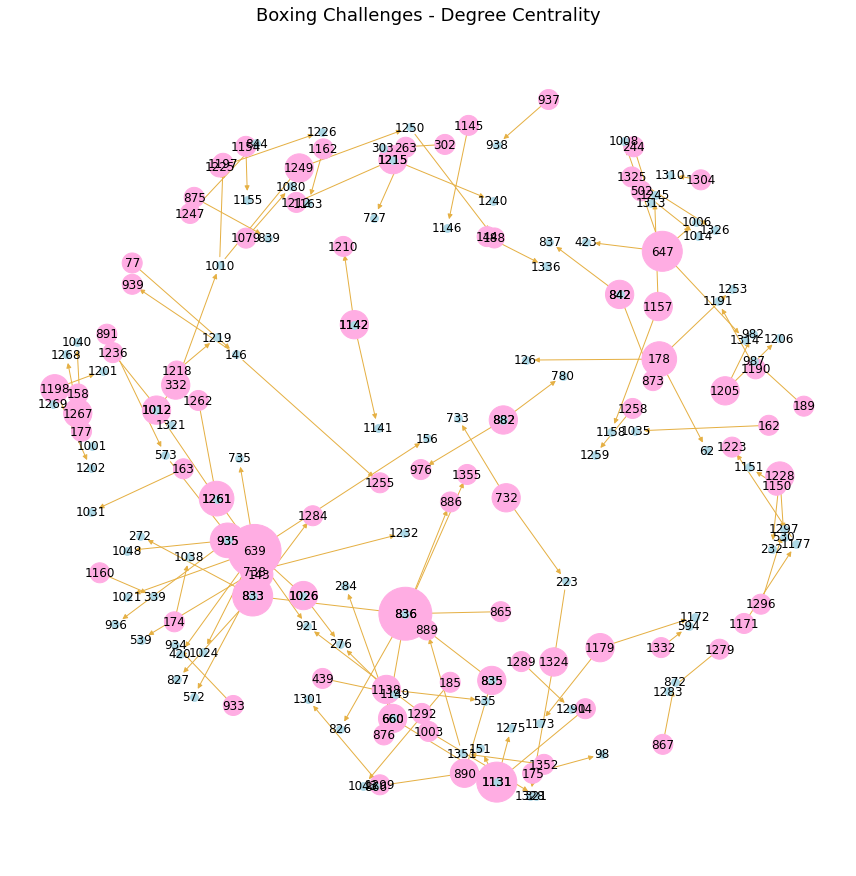

In [31]:
# 3. Draw the parts we want
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw_networkx_edges(g, pos, edge_color='#E5B044',arrows=True, arrowsize=10)

challengers = [node for node in g.nodes() if node in df.challenging_id.unique()]
challenged = [node for node in g.nodes() if node in df.challenged_id.unique()]
size = [g.degree(node) * 400 for node in g.nodes() if node in df.challenging_id.unique()]
nx.draw_networkx_nodes(g, pos, nodelist = challengers, node_size=size, node_color ='#FFADE3')
challengers_dict = dict(zip(challengers, challengers))
nx.draw_networkx_labels(g, pos, labels=challengers_dict)
challenged_dict = dict(zip(challenged, challenged))
nx.draw_networkx_labels(g, pos, labels=challenged_dict)
nx.draw_networkx_nodes(g, pos, nodelist=challenged, node_size=60, node_color ='lightblue')
#Resize figure for label readibility
ax.margins(0.01, 0.05)
fig.tight_layout()
plt.axis("off")
plt.title('Boxing Challenges - Degree Centrality', fontsize=18)
fig5 = plt.gcf()
#fig5.savefig("/Users/hernanadasme/Documents/data_challenges/graph.jpg", dpi=600) 
plt.show()

In [100]:
#alternative 3: with metadadta
B = nx.from_pandas_edgelist(df, 'challenging_id', 'challenged_id')
for box,row in df.iterrows():
    B.nodes[row['challenging_id']]['name'] = row['boxer_challenging']
    B.nodes[row['challenged_id']]['name'] = row['boxer_challenged']
#print(B.nodes(data=True))
print(len(B.nodes()))

180


In [101]:
B.nodes(data=True)

NodeDataView({865: {'name': 'Castillo, Ernesto'}, 836: {'name': 'Baeza, Florencio'}, 882: {'name': 'Araya, Manuel'}, 780: {'name': 'Bolli, Carlos'}, 833: {'name': 'Valdes, Mario'}, 272: {'name': 'Pérez, Amador'}, 976: {'name': 'Ortiz, Rafael'}, 827: {'name': 'Gallardo, Pedro'}, 189: {'name': 'Silva, Carlos'}, 987: {'name': 'Iñiguez, Mario'}, 302: {'name': 'Flores, Sara'}, 303: {'name': 'Farrafino, Clementina'}, 891: {'name': 'Huerta, Francisco'}, 573: {'name': 'Giaverini, Oscar'}, 158: {'name': 'Tapia, Julio'}, 1001: {'name': 'Inostroza, Ruperto'}, 1003: {'name': 'Alley, Juan'}, 321: {'name': 'Salinas, Juan'}, 647: {'name': 'Olguín, Humberto'}, 423: {'name': 'Valdenegro'}, 1006: {'name': 'Henriquez'}, 1008: {'name': 'Leiva'}, 332: {'name': 'Acosta, Luis J.'}, 1010: {'name': 'Molina, Erasmo'}, 1012: {'name': 'Parra, Routier'}, 502: {'name': 'Rios, Agustin'}, 1014: {'name': 'Arratia, Jose'}, 143: {'name': 'Caldera, Francisco'}, 572: {'name': 'Anguita, Oscar'}, 77: {'name': 'Guerrero, Ang

In [102]:
print(len(B.edges()))

120


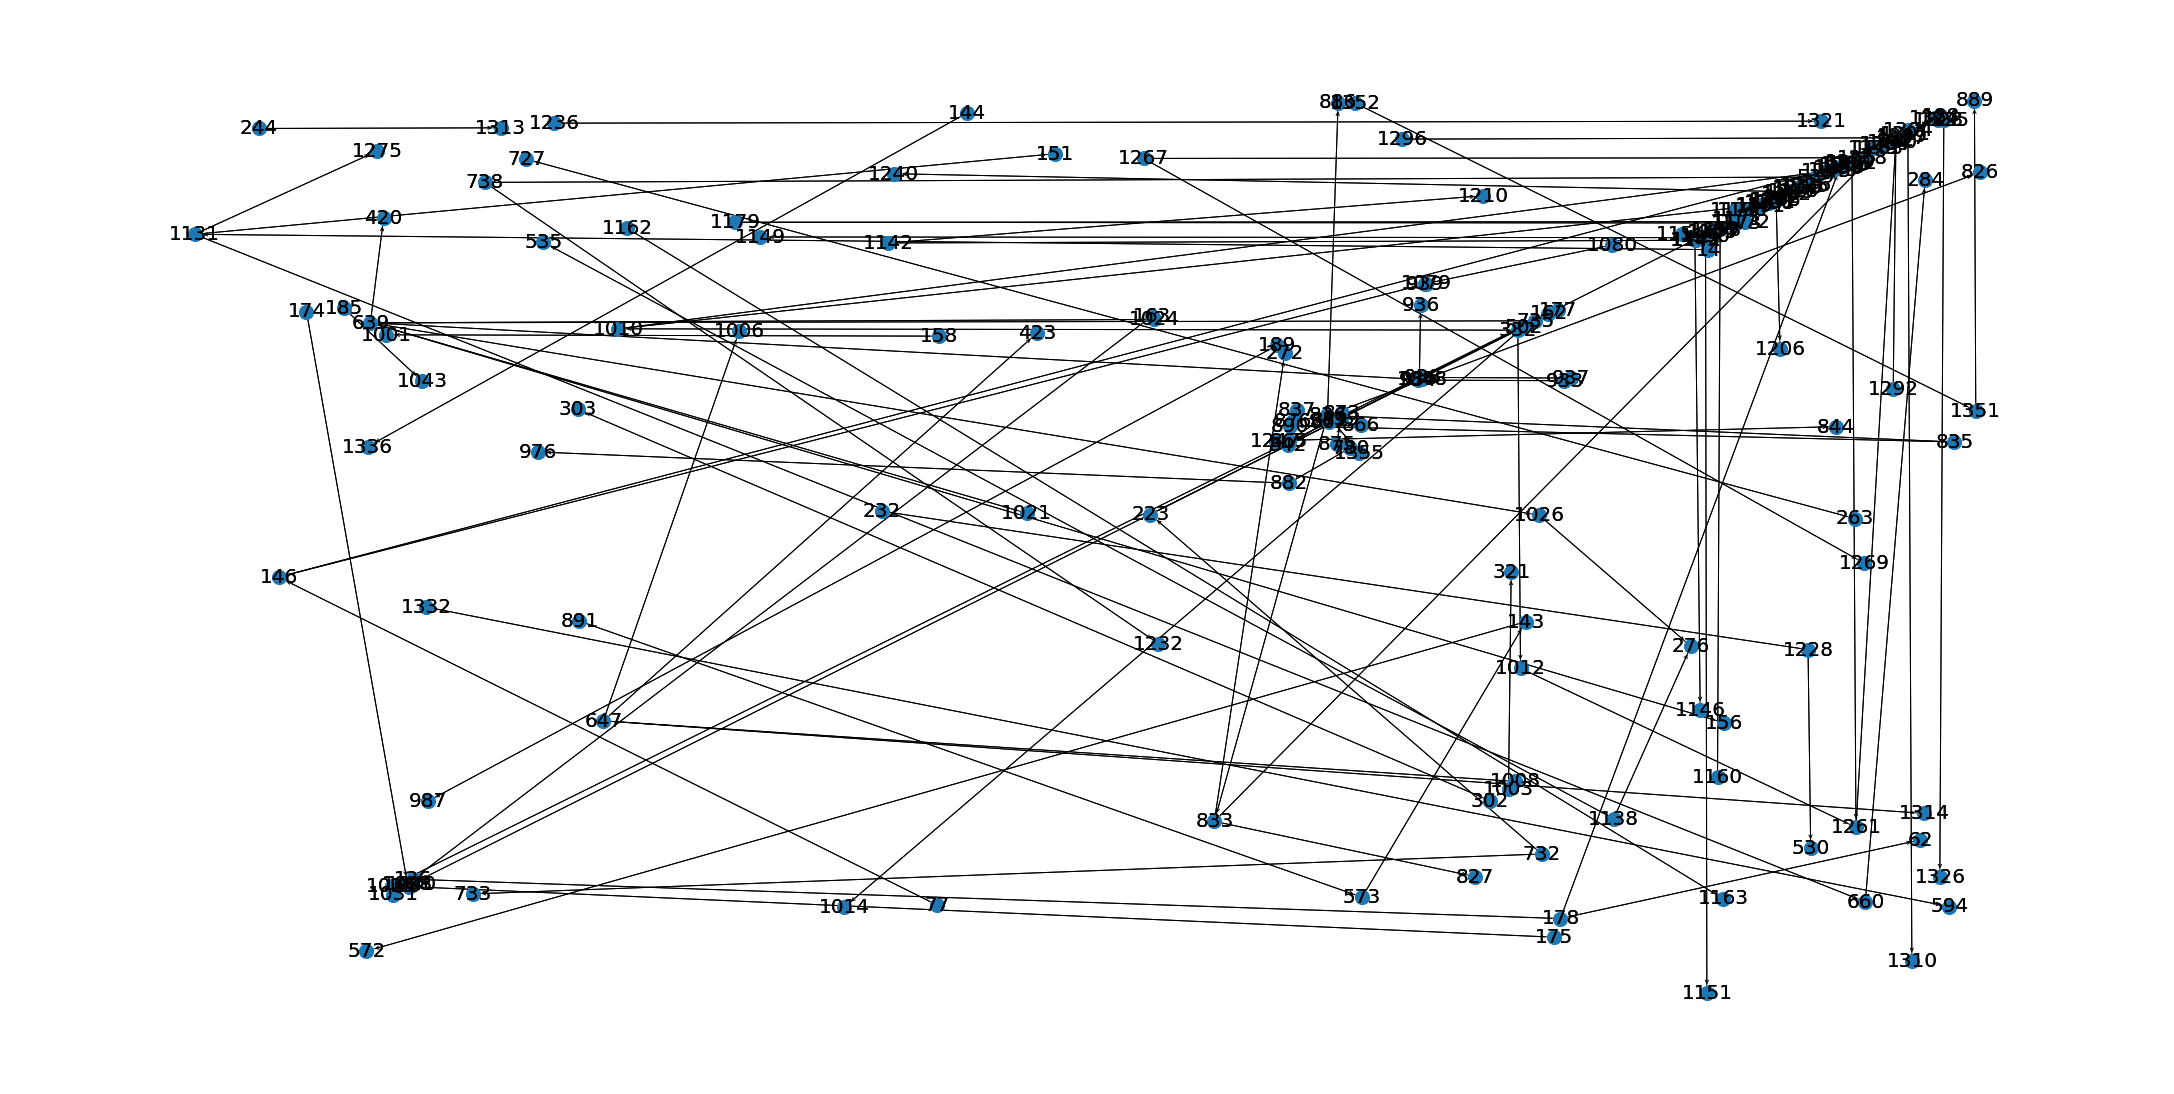

In [150]:
pos = nx.cycle_graph(B)
figure(figsize=(30, 15))
nx.draw(B, pos, with_labels = True, node_size = 200, font_size=20)
nx.draw_networkx_edges(B, pos, arrows=True, arrowsize=8, arrowstyle="->")
nx.draw_networkx_labels(B, pos, font_size=20)
fig1 = plt.gcf()
#fig1.savefig("/Users/hernanadasme/Documents/data_challenges/graph_3.jpg", dpi=600) 

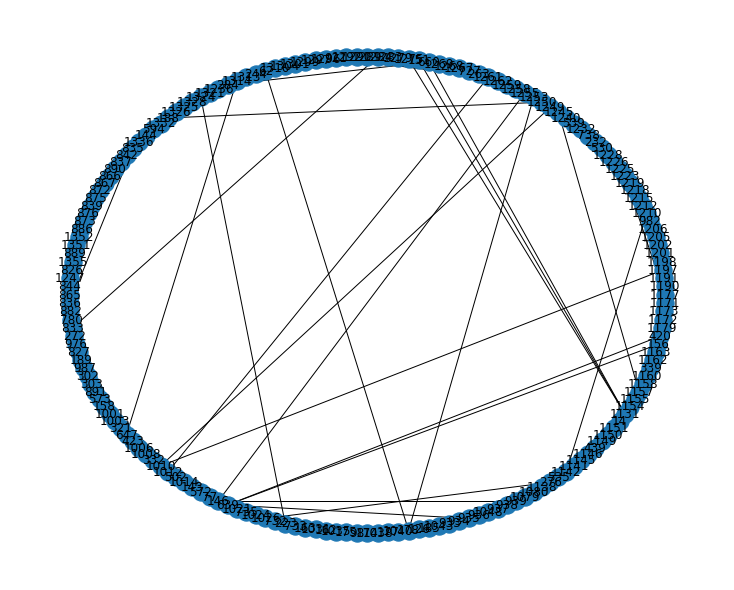

In [109]:
G = nx.from_pandas_edgelist(df, 'challenging_id', 'challenged_id')
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [119]:
# 1. Create the graph
f = nx.from_pandas_edgelist(df, source='challenging_id', target='challenged_id')

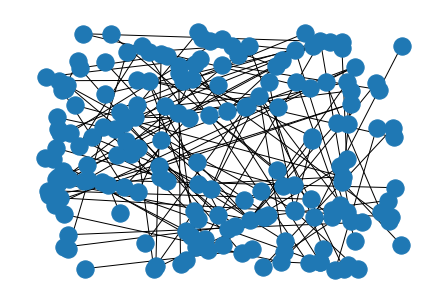

In [120]:
# 2. Create a layout for our nodes 
pos = nx.draw_random(f)
#pos["639"] = (0.005,0.005)

{865: Text(0.44887308616521177, 0.19541185761482893, '865'),
 836: Text(0.31229275481826985, -0.04026535093885594, '836'),
 882: Text(0.25722921611724303, 0.040089390859801635, '882'),
 780: Text(0.4863101963508305, -0.06848924938756613, '780'),
 833: Text(0.10629744671473311, 0.21243144428577618, '833'),
 272: Text(0.21388168360075643, 0.4950076192099317, '272'),
 976: Text(0.01912004316695043, 0.1271230920565385, '976'),
 827: Text(-0.06483105282632674, 0.4354329576973805, '827'),
 189: Text(0.28296544726942885, -0.0459765094890985, '189'),
 987: Text(0.20896345706237904, 0.19638639136351227, '987'),
 302: Text(0.28548470045722074, -0.026101054089511515, '302'),
 303: Text(0.19475644558653726, 0.21050907497354418, '303'),
 891: Text(0.42600819238491383, -0.13800949694614753, '891'),
 573: Text(0.27983554101316677, 0.06930026547260426, '573'),
 158: Text(0.28637233615429597, 0.013905774665698194, '158'),
 1001: Text(0.1635695014440167, 0.23557075874676586, '1001'),
 1003: Text(0.28471

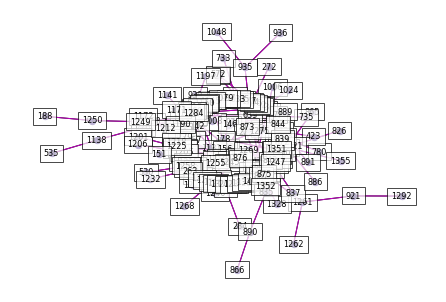

In [142]:
pos = nx.kamada_kawai_layout(B)
nx.draw(B, pos, with_labels = True, node_size = 40, font_size=5, node_color="#210070")
nx.draw_networkx_edges(B, pos, edge_color ="m")
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(B, pos, font_size=8, bbox=label_options)

In [144]:
from pyvis.network import Network
net = Network()

In [ ]:
from pyvis.network import Network
import networkx as nx
nx_graph = nx.cycle_graph(10)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network('500px', '500px')
# populates the nodes and edges data structures
nt.from_nx(nx_graph)
nt.show('nx.html')

[]

In [25]:
challenged_01

[]